In [5]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

# Read Data

In [6]:
# 為了處理方便，把 'train.csv' 和 'test.csv' 合併起來，'test.csv'的 Weather 欄位用 0 補起來。
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
test_dataset['Weather'] = np.zeros((len(test_dataset),))

# 以 train_end_idx 作為 'train.csv' 和 'test.csv' 分界列，
train_end_idx = len(train_dataset)
df = pd.concat([train_dataset, test_dataset], sort=False)

# Preprocessing

In [7]:
# features that we don't want
drop_list = ['Date'] # drop_list = ['Weather', 'Date', 'Loc', 'WindDir', 'DayWindDir', 'NightWindDir']
X_train, y_train = df.drop(columns=['Weather']).drop(columns=drop_list), df['Weather']

In [8]:
columns = X_train.columns
string_list = [col for col in columns if X_train[col].dtype == 'object']

categorical_list = string_list.copy()
categorical_list.append('DayCloud')
categorical_list.append('NightCloud')

numeric_list = [col for col in columns if col not in categorical_list]

In [9]:
columns

Index(['Loc', 'TempLow', 'TempHigh', 'Steaming', 'Sun', 'WindDir', 'WindSpeed',
       'DayWindDir', 'NightWindDir', 'DayWindSpeed', 'NightWindSpeed',
       'DayHumidity', 'NightHumidity', 'DayPressure', 'NightPressure',
       'DayCloud', 'NightCloud', 'DayTemp', 'NightTemp', 'RISK_MM'],
      dtype='object')

0:'Loc'
1:'TempLow'
2:'TempHigh'
3:'Steaming'
4:'Sun'
5:'WindDir'
6:'WindSpeed'
7:'DayWindDir'
8:'NightWindDir'
9:'DayWindSpeed'
10:'NightWindSpeed'
11:'DayHumidity'
12:'NightHumidity'
13:'DayPressure'
14:'NightPressure'
15:'DayCloud'
16:'NightCloud'
17:'DayTemp'
18:'NightTemp'
19:'RISK_MM'

In [10]:
# fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
# plt.suptitle("Correlations", fontsize=20)

# count = 0
# col = 0
# for i in range(4):
#     for j in range(4):
#         axes[i,j].scatter(X_train[y_train==1][numeric_list[col]],X_train[y_train==1][numeric_list[count]],color=["crimson"],s=50,alpha=0.8,label='1')
#         axes[i,j].scatter(X_train[y_train==0][numeric_list[col]],X_train[y_train==0][numeric_list[count]],color=["chartreuse"],s=20,label="0")
#         axes[i,j].set_xlabel(numeric_list[col])
#         axes[i,j].set_ylabel(numeric_list[count])
#         axes[i,j].legend(prop={'size': 10},loc="lower left") #圖例setting
#         col += 1

In [11]:
# length = len(X_train)

# for i in range(length):
#     if pd.isna(X_train.iloc[i,5]):
#         if not pd.isna(X_train.iloc[i,7]):
#             X_train.iloc[i,5] = X_train.iloc[i,7]
#         elif not pd.isna(X_train.iloc[i,8]):
#             X_train.iloc[i,5] = X_train.iloc[i,8]
#     if pd.isna(X_train.iloc[i,7]):
#         if not pd.isna(X_train.iloc[i,5]):
#             X_train.iloc[i,7] = X_train.iloc[i,5]
#         elif not pd.isna(X_train.iloc[i,8]):
#             X_train.iloc[i,7] = X_train.iloc[i,8]
#     if pd.isna(X_train.iloc[i,8]):
#         if not pd.isna(X_train.iloc[i,5]):
#             X_train.iloc[i,8] = X_train.iloc[i,5]
#         elif not pd.isna(X_train.iloc[i,7]):
#             X_train.iloc[i,8] = X_train.iloc[i,7]

#     if pd.isna(X_train.iloc[i,1]):
#         X_train.iloc[i,1] = 
#     if pd.isna(X_train.iloc[i,7]):
#         if not pd.isna(X_train.iloc[i,5]):
#             X_train.iloc[i,7] = X_train.iloc[i,5]

In [12]:
X_train['WindDir'].isna().sum()

17389

In [13]:
# Handle missing values
# df = df.fillna(0)
X_train['WindDir'] = X_train['WindDir'].fillna(X_train['DayWindDir'])
X_train['DayWindDir'] = X_train['DayWindDir'].fillna(X_train['WindDir'])
X_train['NightWindDir'] = X_train['NightWindDir'].fillna(X_train['WindDir'])

X_train['WindSpeed'] = X_train['WindSpeed'].fillna(X_train['DayWindSpeed'])
X_train['DayWindSpeed'] = X_train['DayWindSpeed'].fillna(X_train['WindSpeed'])
X_train['NightWindSpeed'] = X_train['NightWindSpeed'].fillna(X_train['WindSpeed'])

X_train['TempLow'] = X_train['TempLow'].fillna(X_train['DayTemp'])
X_train['TempHigh'] = X_train['TempHigh'].fillna(X_train['NightTemp'])
X_train['DayTemp'] = X_train['DayTemp'].fillna(X_train['TempHigh'])
X_train['NightTemp'] = X_train['NightTemp'].fillna(X_train['TempHigh'])

X_train['DayPressure'] = X_train['DayPressure'].fillna(X_train['NightPressure'])
X_train['NightPressure'] = X_train['NightPressure'].fillna(X_train['NightPressure'])

for d in string_list:
    X_train[d] = X_train[d].fillna('Unknown')

In [14]:
from sklearn.preprocessing import LabelEncoder

for d in string_list:
    labelEncoder = LabelEncoder()
    labelEncoder.fit(X_train[d])
    X_train[d] = labelEncoder.transform(X_train[d]).astype(float)


In [15]:
mean = X_train.mean()
X_train = X_train.fillna(mean)

In [16]:
# one-hot encoding
# for d in categorical:
#     X_train.drop(columns=d)
#     X_train = X_train.join(pd.get_dummies(X_train[d]))
X_train = pd.get_dummies(data=X_train, columns=categorical_list)
# X_train

In [17]:
X_train

,TempLow,TempHigh,Steaming,Sun,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,NightHumidity,DayPressure,...,NightCloud_2.0,NightCloud_3.0,NightCloud_4.0,NightCloud_4.27812027,NightCloud_4.278214514770263,NightCloud_5.0,NightCloud_6.0,NightCloud_7.0,NightCloud_8.0,NightCloud_9.0
0,19.5,19.600000,5.694960,0.500000,61.0,31.0,22.0,86.641375,41.810006,1020.4,...,0,0,0,0,0,0,0,1,0,0
1,2.1,15.700000,5.701668,5.700000,26.0,9.0,7.0,53.275715,76.598048,1023.7,...,0,0,0,0,0,0,0,0,0,0
2,20.9,36.100000,5.694960,8.003251,39.0,31.0,17.0,15.471574,52.163254,1017.1,...,0,0,0,1,0,0,0,0,0,0
3,11.5,23.900000,5.694960,7.993227,35.0,7.0,17.0,46.442398,67.664733,1010.2,...,0,0,0,1,0,0,0,0,0,0
4,8.2,20.500000,3.200000,8.003251,69.0,69.0,69.0,51.830889,51.770240,1001.2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,9.6,21.500000,8.000000,12.000000,31.0,17.0,9.0,39.878487,57.490952,1024.5,...,0,0,0,0,0,0,1,0,0,0
34840,11.6,31.400000,5.694960,7.993227,39.0,7.0,39.0,51.902205,70.743790,1019.1,...,0,0,0,1,0,0,0,0,0,0
34841,22.2,34.500000,5.701668,7.600000,39.0,26.0,39.0,30.743840,64.412890,1008.5,...,0,0,0,0,0,0,0,1,0,0
34842,16.4,43.500000,7.000000,12.700000,43.0,19.0,19.0,28.084916,63.565166,1014.2,...,0,0,0,1,0,0,0,0,0,0


# Split Data

In [18]:
from sklearn.model_selection import train_test_split

X_col = X_train.columns

# Split data
X_test = X_train.values[train_end_idx:, :]
X_train, X_val, y_train, y_val = train_test_split(X_train.values[:train_end_idx], y_train.values[:train_end_idx], test_size=0.2)

X_train = pd.DataFrame(data=X_train, columns=X_col)
X_val = pd.DataFrame(data=X_val, columns=X_col)
X_test = pd.DataFrame(data=X_test, columns=X_col)

# Over-Sampling

In [19]:
# print(y_train.value_counts())
print(np.unique(y_train, return_counts=True))

# Over sampling
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Under sampling
from imblearn.under_sampling import TomekLinks
X_train, y_train = TomekLinks().fit_resample(X_train, y_train)

# print(y_train.value_counts())
print(np.unique(y_train, return_counts=True))

(array([0., 1.]), array([25135,  2989], dtype=int64))
(array([0., 1.]), array([25135, 25112], dtype=int64))


# Normalization

In [20]:
from sklearn.preprocessing import StandardScaler

# Normalization
features = X_train[numeric_list]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[numeric_list] = features
# X_train

val_features = X_val[numeric_list]
val_features = scaler.transform(val_features.values)
X_val[numeric_list] = val_features
# X_val

test_features = X_test[numeric_list]
test_features = scaler.transform(test_features.values)
X_test[numeric_list] = test_features
# X_test

# Dimension Reduction

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=130)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_val = pca.transform(X_val)
# X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(50335, 139)

In [ ]:
# from sklearn import preprocessing
# X_train[numeric_list] = preprocessing.normalize(X_train[numeric_list])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Normalization
# standardScaler = StandardScaler()
# standardScaler.fit(X_train)
# X_train = standardScaler.transform(X_train)

# train

In [21]:
from sklearn.metrics import accuracy_score, f1_score

In [22]:
from sklearn.tree import DecisionTreeClassifier

#train tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.838595
f1-score: 0.252798


In [23]:
from sklearn.neighbors import KNeighborsClassifier

#train tree model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.625853
f1-score: 0.293691


In [31]:
from sklearn.svm import SVC

# train tree 
model = SVC(kernel='rbf', C=2)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.886661
f1-score: 0.395754


In [24]:
from sklearn.linear_model import LogisticRegression

#train tree model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.756399
f1-score: 0.384919


In [25]:
from sklearn.ensemble import RandomForestClassifier

#train tree model
model = RandomForestClassifier(criterion='entropy', n_estimators=200)
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.906712
f1-score: 0.165394


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#train tree model
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.828658
f1-score: 0.363492


In [26]:
from sklearn.naive_bayes import GaussianNB

#train tree model
model = GaussianNB()
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.719710
f1-score: 0.283533


In [27]:
from sklearn.neural_network import MLPClassifier

#train tree model
model = MLPClassifier(hidden_layer_sizes=(32,16,5), activation='relu', solver='adam', batch_size=200, learning_rate_init=1e-3, max_iter=200)
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_val)
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Accuracy: 0.839590
f1-score: 0.326969


C:\Users\peggy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),])

history = model.fit(X_train, y_train, batch_size=200, epochs=20, validation_data=(X_val, y_val))

#predict
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype('int32').flatten()
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

Epoch 1/20
252/252 [==============================] - 4s 11ms/step - loss: 0.5093 - binary_accuracy: 0.7485 - val_loss: 0.4466 - val_binary_accuracy: 0.7676
Epoch 2/20
252/252 [==============================] - 2s 8ms/step - loss: 0.4031 - binary_accuracy: 0.8203 - val_loss: 0.3691 - val_binary_accuracy: 0.8238
Epoch 3/20
252/252 [==============================] - 2s 8ms/step - loss: 0.3293 - binary_accuracy: 0.8613 - val_loss: 0.3436 - val_binary_accuracy: 0.8422
Epoch 4/20
252/252 [==============================] - 2s 9ms/step - loss: 0.2647 - binary_accuracy: 0.8936 - val_loss: 0.3212 - val_binary_accuracy: 0.8599
Epoch 5/20
252/252 [==============================] - 2s 8ms/step - loss: 0.2194 - binary_accuracy: 0.9127 - val_loss: 0.3378 - val_binary_accuracy: 0.8589
Epoch 6/20
252/252 [==============================] - 2s 7ms/step - loss: 0.1893 - binary_accuracy: 0.9263 - val_loss: 0.3468 - val_binary_accuracy: 0.8599
Epoch 7/20
252/252 [==============================] - 3s 11ms/s

In [1083]:
#predict
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype('int32').flatten()
print('Accuracy: %f' % accuracy_score(y_val, y_pred))
print('f1-score: %f' % f1_score(y_val, y_pred))

220/220 [==============================] - 1s 3ms/step
Accuracy: 0.863197
f1-score: 0.380952


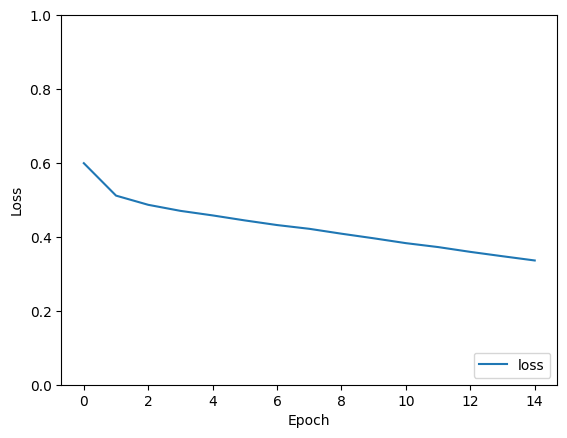

In [1011]:
# plot lost curve
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [33]:
ans_pred = model.predict(X_test)
# ans_pred = (ans_pred > 0.5).astype('int32').flatten()
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')